In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('data/Books.csv')
users = pd.read_csv('data/Users.csv')
ratings = pd.read_csv('data/Ratings.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5176\927319382.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [52]:
ratings.head()
ratings.rename(columns={'Book-Rating':'rate','User-ID':'userid'},inplace=True)

In [30]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

<Axes: >

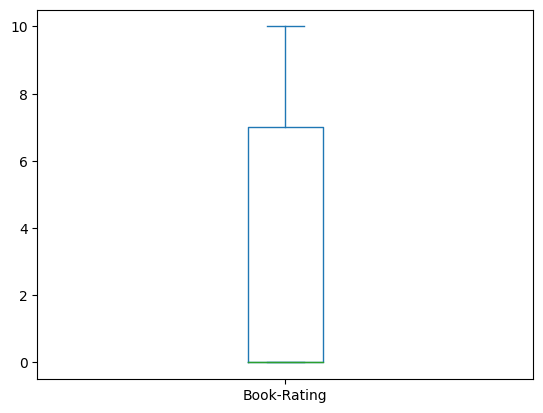

In [51]:
ratings['Book-Rating'].plot.box()

(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

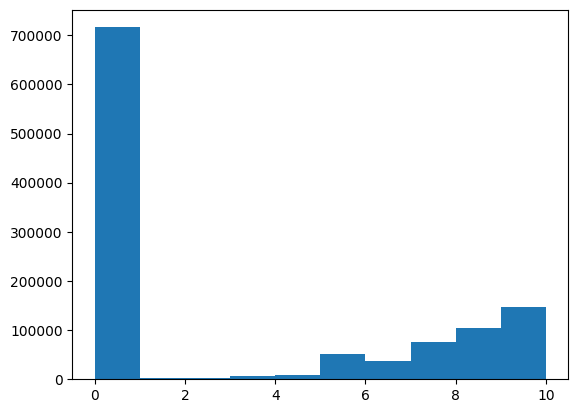

In [36]:
# ratings['Book-Rating'].plot.kde()
plt.hist(ratings['Book-Rating'])

In [99]:
# no of users who have actually voted many books
temp = ratings.groupby(by = 'userid').count().sort_values(['rate'],ascending=False)
temp[:1000]






,ISBN,rate
userid,,
11676,13602,13602
198711,7550,7550
153662,6109,6109
98391,5891,5891
35859,5850,5850
...,...,...
80810,183,183
180378,183,183
179730,182,182


In [138]:
temp1 = ratings.groupby(by = 'ISBN').count().sort_values(['rate'],ascending = False)


In [154]:
temp1.rate.quantile(.9999)

419.94449999998324

In [121]:
temp1.rate[:100]

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0142000205     277
0345351525     273
0449212602     273
080410753X     273
014028009X     270
Name: rate, Length: 100, dtype: int64

## Simple  Recommender based on mostpupular 
### weighted ratings

### Weighted Rating (WR) =  (v/(v+m)  *  R)+(m(v+m)  * C)
 

where,

v is the number of votes for the movie
m is the minimum votes required to be listed in the chart
R is the average rating of the movie
C is the mean vote across the whole report

In [174]:
temp1 = ratings.groupby(by = 'ISBN').mean('rate')

In [194]:
temp1


,userid,rate
ISBN,,
0330299891,135504.5,3.0
0375404120,178028.5,1.5
0586045007,89192.0,0.0
9022906116,50434.0,3.5
9032803328,89192.0,0.0
...,...,...
cn113107,107301.0,0.0
ooo7156103,266146.0,7.0
§423350229,85250.0,0.0


In [176]:
v = ratings.groupby(by = 'ISBN').count()
v

,userid,rate
ISBN,,
0330299891,2,2
0375404120,2,2
0586045007,1,1
9022906116,2,2
9032803328,1,1
...,...,...
cn113107,1,1
ooo7156103,1,1
§423350229,1,1


In [191]:
qualified = pd.merge(v,books,on='ISBN',how='left')[['ISBN','rate','Book-Title']]

In [192]:
# Filter and rename without using inplace=True
qualified = qualified[qualified['Book-Title'].notnull()]
qualified = qualified.rename(columns={'rate': 'count'})

qualified


,ISBN,count,Book-Title
107,0000913154,1,The Way Things Work: An Illustrated Encycloped...
108,0001010565,2,Mog's Christmas
111,0001046438,1,Liar
113,0001046713,1,Twopence to Cross the Mersey
114,000104687X,1,"T.S. Eliot Reading \The Wasteland\"" and Other ..."
...,...,...,...
339973,B000234N76,1,Falling Angels
339974,B000234NC6,1,It Must've Been Something I Ate: The Return of...
339975,B00029DGGO,1,"Good Wife Strikes Back, The"
339976,B0002JV9PY,1,The Blockade Runners


In [198]:
final = pd.merge(qualified,temp1,on='ISBN',how='left')
final.head()

,ISBN,count,Book-Title,userid,rate
0,0000913154,1,The Way Things Work: An Illustrated Encycloped...,171118.0,8.0
1,0001010565,2,Mog's Christmas,147819.5,0.0
2,0001046438,1,Liar,23902.0,9.0
3,0001046713,1,Twopence to Cross the Mersey,196149.0,0.0
4,000104687X,1,"T.S. Eliot Reading \The Wasteland\"" and Other ...",23902.0,6.0


In [165]:
C = ratings[ratings.rate>0].groupby('ISBN').mean('rate').rate.mean()
C

7.491347093699123

In [220]:
m = temp.rate.quantile(.995)
m

316.0

In [219]:
best = final[final['count']>m]
best.shape

(75, 5)

In [221]:
def weighted_rating(x):
    v = x['count']
    R = x['rate']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [224]:
# Use .loc[] to set the value
best.loc[:, 'wr'] = best.apply(weighted_rating, axis=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5176\3878093142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best.loc[:, 'wr'] = best.apply(weighted_rating, axis=1)


In [226]:
best = best.sort_values('wr', ascending=False).head(250)


,ISBN,count,Book-Title,userid,rate,wr
84467,043935806X,334,Harry Potter and the Order of the Phoenix (Boo...,144794.565868,5.571856,6.505024
91208,0446310786,389,To Kill a Mockingbird,135597.316195,4.920308,6.072717
83626,0439064872,351,Harry Potter and the Chamber of Secrets (Book 2),136209.652422,4.729345,6.037880
43320,0345342968,321,Fahrenheit 451,136557.987539,4.408100,5.937623
38733,0316769487,403,The Catcher in the Rye,144895.766749,4.635236,5.890495
...,...,...,...,...,...,...
62134,0375727345,552,House of Sand and Fog,136976.443841,3.039855,4.660444
86866,0440222656,420,The Horse Whisperer,136926.716667,2.483333,4.633513
87397,044023722X,647,A Painted House,139784.984544,3.187017,4.599445
86455,0440214041,523,The Pelican Brief,136733.818356,2.523901,4.394834


In [227]:
best.head()

,ISBN,count,Book-Title,userid,rate,wr
84467,043935806X,334,Harry Potter and the Order of the Phoenix (Boo...,144794.565868,5.571856,6.505024
91208,0446310786,389,To Kill a Mockingbird,135597.316195,4.920308,6.072717
83626,0439064872,351,Harry Potter and the Chamber of Secrets (Book 2),136209.652422,4.729345,6.037880
43320,0345342968,321,Fahrenheit 451,136557.987539,4.408100,5.937623
38733,0316769487,403,The Catcher in the Rye,144895.766749,4.635236,5.890495


# Colaborative filtering


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [230]:
from surprise import Reader, Dataset, SVD, evaluate

ModuleNotFoundError: No module named 'surprise'

In [233]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [115 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-310\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-310\surprise
  creating build\lib.win-amd64-cpython-310\surprise\model_selection
  copying surprise\model_selection\search.py -> build\lib.win-amd64

In [ ]:
type(books['Book-Title'].value_counts())


pandas.core.series.Series

In [ ]:
books['Book-Author'].value_counts()

Book-Author
Agatha Christie        435
Stephen King           402
William Shakespeare    341
Ann M. Martin          307
Carolyn Keene          276
                      ... 
Dean Buckhorn            1
Jean Armour Polly        1
Sara Yeomans             1
Stacy DeBroff            1
Joel Champetier          1
Name: count, Length: 63278, dtype: int64

In [ ]:
books[books['Book-Title'] == 'Little Women'].iloc[0,7]

'http://images.amazon.com/images/P/185854176X.01.LZZZZZZZ.jpg'

# Populaity Based

In [ ]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
ratings_with_name = ratings.merge(books, on='ISBN')

In [ ]:
test = ratings_with_name['Book-Title'].unique()


array(['Flesh Tones: A Novel', 'The Notebook', 'A Painted House',
       'Lightning', 'Manhattan Hunt Club'], dtype=object)

In [ ]:
len(set(test))
## it shows in ratings there are only 11312 books which are also in our books.csv

11312

In [ ]:
# ratings_with_name.head(2)
ratings_with_name.shape

(65427, 10)

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
# num_rating_df[0:5]

In [ ]:
# prompt: avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index() correct this

avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df[0:5]


,Book-Title,avg_ratings
0,It Takes Two,0.000000
1,Tales of Terror and Suspense,0.000000
2,'48,0.000000
3,'Salem's Lot,3.333333
4,".NET Framework Essentials, 3rd Edition",0.000000


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df.head()

,Book-Title,num_ratings,avg_ratings
0,It Takes Two,2,0.000000
1,Tales of Terror and Suspense,1,0.000000
2,'48,1,0.000000
3,'Salem's Lot,3,3.333333
4,".NET Framework Essentials, 3rd Edition",1,0.000000


In [ ]:
popular_df[popular_df['num_ratings'] >0].shape

(11312, 3)

In [ ]:
pdf = popular_df[popular_df['num_ratings'] >= 100].sort_values('avg_ratings', ascending=False).reset_index(drop=True)
pdf.head()
# popular_df.shape

,Book-Title,num_ratings,avg_ratings
0,To Kill a Mockingbird,109,5.119266
1,Harry Potter and the Chamber of Secrets (Book 2),113,5.088496
2,The Secret Life of Bees,111,4.945946
3,The Da Vinci Code,172,4.622093
4,The Lovely Bones: A Novel,256,4.589844


In [ ]:
pdf.shape

(31, 3)

In [ ]:
pdf = pdf.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

In [ ]:
pdf.shape

(31, 5)

# Popularity based done!

# Colaborative Filtering

In [ ]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
ratings_with_name.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'].sort_values(ascending=False) > 200

In [ ]:
x[x].shape

(27,)

In [ ]:
#https://www.projectpro.io/article/llama-projects/1007#mcetoc_1hst09bdvc
# edex vr tiny ml course